# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/175T2m1qX0IaBmlRQBGGMg2zuszS-AhVk?usp=sharing)

https://wikidocs.net/35476

06-09 소프트맥스 회귀(Softmax Regression)

1. 다중 클래스 분류(Multi-class Classification)

앞서 로지스틱 회귀에서 사용한 시그모이드 함수는 입력된 데이터에 대해서 0과 1사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률로 해석할 수 있도록 만들어주었습니다. 예를 들어 0이 정상 메일, 1이 스팸 메일이라고 정의해놓는다면 시그모이드 함수의 0과 1사이의 출력값을 스팸 메일일 확률로 해석할 수 있었습니다. 확률값이 0.5를 넘으면 1에 가까우니 스팸 메일로 판단하면 되고, 그 반대라면 정상 메일로 판단하면 됩니다.

이진 분류가 두 개의 선택지 중 하나를 고르는 문제였다면, 세 개 이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류라고 합니다. 아래의 붓꽃 품종 예측 데이터는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이로부터 setosa, versicolor, virginica라는 3개의 품종 중 어떤 품종인지를 예측하는 문제를 위한 데이터로 전형적인 다중 클래스 분류 문제를 위한 데이터입니다.

2. 소프트맥스 함수(Softmax function)

소프트맥스 함수는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다. 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보겠습니다.

1) 소프트맥스 함수의 이해

2) 그림을 통한 이해

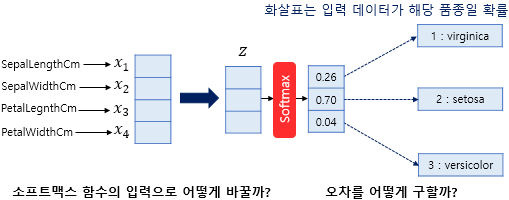

위의 그림에 점차 살을 붙여가는 식으로 설명합니다. 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해봅시다. 즉, 배치 크기가 1입니다.

위의 그림에는 두 가지 의문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 의문입니다. 하나의 샘플 데이터는 4개의 독립 변수 x
를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미합니다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 합니다. 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 z
로 표현하였습니다.

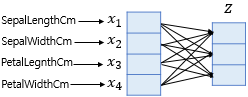

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단합니다. 소프트맥스 함수의 입력 벡터 z
의 차원수만큼 결과값이 나오도록 가중치 곱을 진행합니다. 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

두번째 질문은 오차 계산 방법에 대한 의문입니다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다. 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 p1
은 virginica가 정답일 확률, 두번째 원소인 p2
는 setosa가 정답일 확률, 세번째 원소인 p3
은 versicolor가 정답일 확률로 고려하고자 합니다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

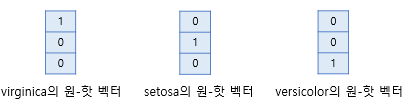

위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 p1
가 virginica가 정답일 확률, 두번째 원소 p2
가 setosa가 정답일 확률, 세번째 원소 p3
가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여줍니다.

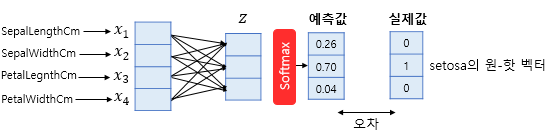

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]입니다. 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우입니다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 비용 함수를 설명하는 부분에서 다시 언급하겠습니다.

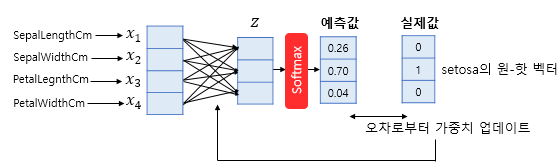

앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 합니다.



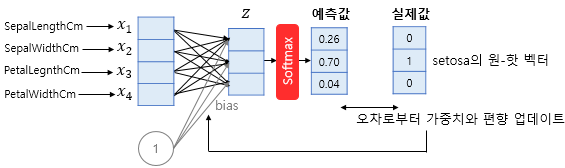

더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이트의 대상이 되는 매개 변수입니다. 소프트맥스 회귀를 벡터와 행렬 연산으로 이해해봅시다. 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 x
라고 하고, 가중치 행렬을 W
, 편향을 b
라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같습니다.

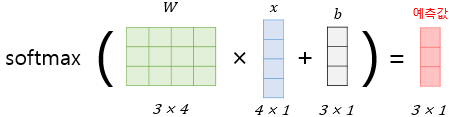

3. 원-핫 벡터의 무작위성

꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법입니다.

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요합니다. 이때 직관적으로 생각해볼 수 있는 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 겁니다. 예를 들어서 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 합니다. 또는 분류해야 할 클래스가 4개고 인덱스를 숫자 1부터 시작하고 싶다고 하면 {baby, child, adolescent, adult}라면 1, 2, 3, 4로 레이블을 해볼 수 있습니다. 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 있습니다. 그 이유를 알아봅시다.

Banana, Tomato, Apple라는 3개의 클래스가 존재하는 문제가 있다고 해봅시다. 레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여하였습니다. 손실 함수로 선형 회귀 실습에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있습니다. 아래의 식은 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것입니다.
는 예측값을 의미합니다.

Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2

직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱 오차로만 판단해봅시다.

실제값이 Tomato일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.
(2-1)^{2} = 1
실제값이 Apple일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.
(3-1)^{2} = 4
즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큽니다. 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없습니다. 더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해봅시다.

{Banana :1, Tomato :2, Apple :3, Strawberry :4, ... Watermelon :10}  
이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고 있습니다. 이는 사용자가 부여하고자 했던 정보가 아닙니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있습니다. 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우입니다. 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당됩니다. 하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배합니다.

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때 각 클래스 간의 제곱 오차가 균등함을 보여줍니다.

((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2

((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다. 뒤에서 다시 언급되겠지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

4. 비용 함수(Cost function)

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용합니다. 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해보겠습니다.

1) 크로스 엔트로피 함수

아래에서 y
는 실제값을 나타내며, k
는 클래스의 개수로 정의합니다. yj
는 실제값 원-핫 벡터의 j
번째 인덱스를 의미하며, pj
는 샘플 데이터가 j
번째 클래스일 확률을 나타냅니다. 표기에 따라서 yhat
로 표현하기도 합니다.

cost = -\sum_{j=1}^{k}y_{j}\ log(p_{j})

2) 이진 분류에서의 크로스 엔트로피 함수

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식입니다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해봅시다.

cost = -(y\ logH(X) + (1-y)\ log(1-H(X)))

5. 인공 신경망 다이어그램

n개의 특성을 가지고 m개의 클래스를 분류하는 소프트맥스 회귀를 뒤에서 배우게 되는 인공 신경망의 형태로 표현하면 다음과 같습니다. 소프트맥스 회귀 또한 하나의 인공 신경망으로 볼 수 있습니다.

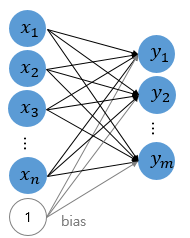

사실 위의 그림은 앞서 소프트맥스 함수를 사용하기 위해 설명했던 아래의 그림에서 특성의 개수를
으로 하고, 클래스의 개수를
으로 일반화한 뒤에 그림을 좀 더 요약해서 표현한 것으로 봐도 무방합니다.

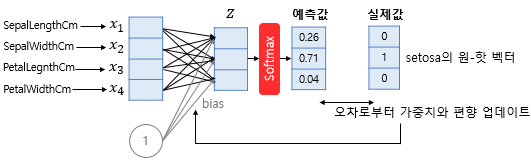

06-10 소프트맥스 회귀 실습

이번에 실습할 데이터는 앞서 다중 클래스 분류를 설명하기 위해 예시로 들었던 붓꽃 품종 분류 문제입니다. 데이터를 직접 다운로드 받고, 데이터에 대한 탐색 과정을 거친 후 모델을 설계해보겠습니다.

데이터 다운로드 링크 : https://www.kaggle.com/saurabh00007/iriscsv

1. 아이리스 품종 데이터에 대한 이해

In [5]:
import os

In [6]:
os.getcwd()

'/content'

In [7]:
!wget [https://www.kaggle.com/datasets/saurabh00007/iriscsv?select=Iris.csv]

[https://www.kaggle.com/datasets/saurabh00007/iriscsv?select=Iris.csv]: Scheme missing.


In [8]:
!wget "https://www.kaggle.com/datasets/saurabh00007/iriscsv?select=Iris.csv"


--2023-08-16 12:25:44--  https://www.kaggle.com/datasets/saurabh00007/iriscsv?select=Iris.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘iriscsv?select=Iris.csv’

iriscsv?select=Iris     [ <=>                ]  11.15K  --.-KB/s    in 0s      

2023-08-16 12:25:44 (41.1 MB/s) - ‘iriscsv?select=Iris.csv’ saved [11422]



In [9]:
os.listdir()

['.config', 'iriscsv?select=Iris.csv', 'sample_data']

1. 아이리스 품종 데이터에 대한 이해

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])


샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


데이터는 6개의 열로 구성된 총 150개의 샘플로 구성되어져 있습니다. 각 샘플의 인덱스를 의미하는 첫번째 열인 Id는 실질적으로 의미는 없는 열입니다. 그 후 특성(feature)에 해당하는 SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm 4개의 열이 존재합니다. 마지막 열 Species는 해당 샘플이 어떤 품종인지를 의미하며 여기서 예측해야 하는 레이블에 해당됩니다. Species열에서 품종이 몇 개 존재하는지 출력합니다.

In [12]:
print("품종 종류:", data["Species"].unique(), sep = '\n')

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Species는 Iris-setosa, Iris-versicolor, Iris-virginica라는 3개의 품종으로 구성되어져 있습니다. 즉, 이번 데이터를 가지고 푸는 문제는 주어진 샘플 데이터의 4개의 특성으로부터 3개 중 어떤 품종인지를 예측하는 문제가 되겠습니다. 3개의 품종이 4개의 특성에 대해서 어떤 분포를 가지고 있는지 시각화해봅시다. seaborn의 pairplot은 데이터프레임을 입력으로 받아 데이터프레임의 각 열의 조합에 따라서 산점도(scatter plot)를 그립니다.

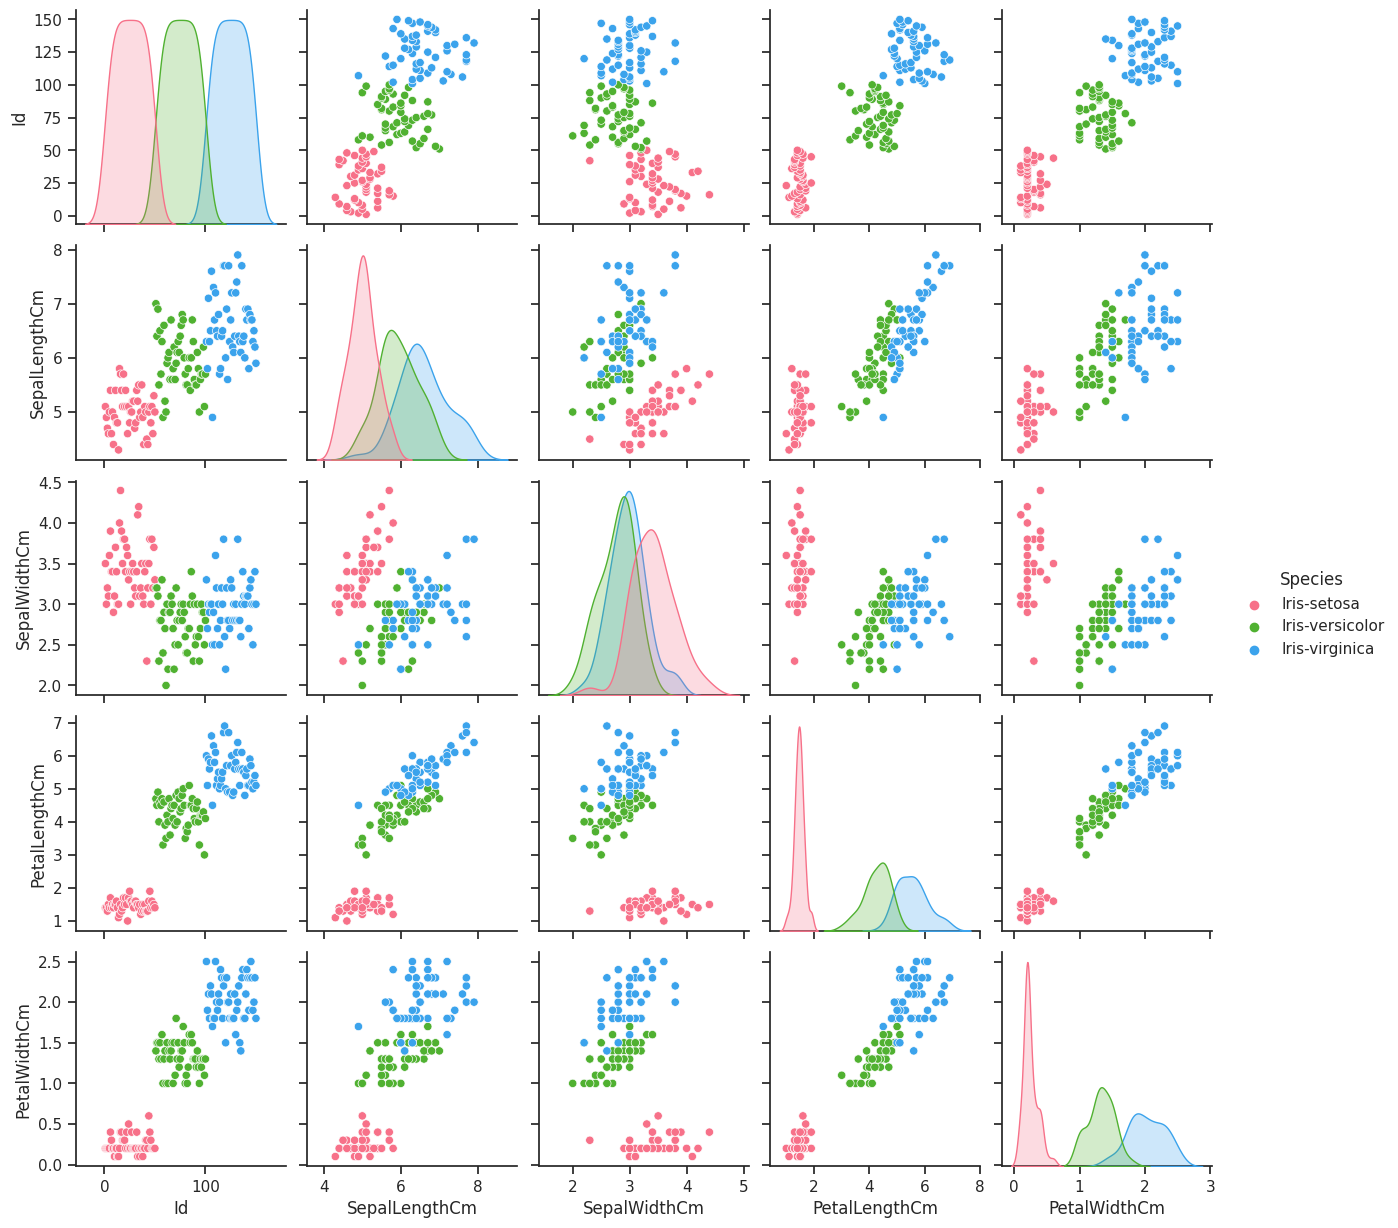

In [13]:
sns.set(style = 'ticks', color_codes = True)
g = sns.pairplot(data, hue="Species", palette = "husl")

해당 입력의 경우에는 4개의 특성에 해당하는 SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm에 대해서 모든 쌍(pair)의 조합인 16개의 경우에 대해서 산점도를 그립니다. 만약 동일한 특성의 쌍일 경우에는 히스토그램으로 나타내는데 가령, SepalLengthCm와 SepalLengthCm의 조합이 그렇습니다. seaborn의 barplot을 통해 종과 특성에 대한 연관 관계를 출력할 수도 있습니다. 예를 들어 각 종에 따른 SepalWidthCm의 값을 확인해봅시다.

In [14]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci = None)

TypeError: ignored

<ipython-input-15-b2c138c8874a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)


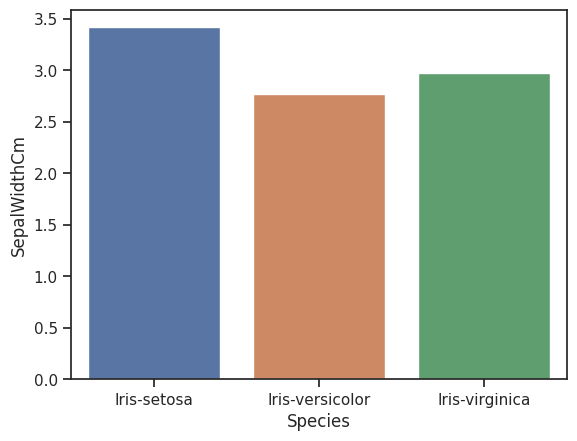

In [15]:
sns.barplot(x='Species', y='SepalWidthCm', data=data, ci=None)
plt.show()

150개의 샘플 데이터 중에서 Species열에서 각 품종이 몇 개있는지 확인합니다.

<Axes: >

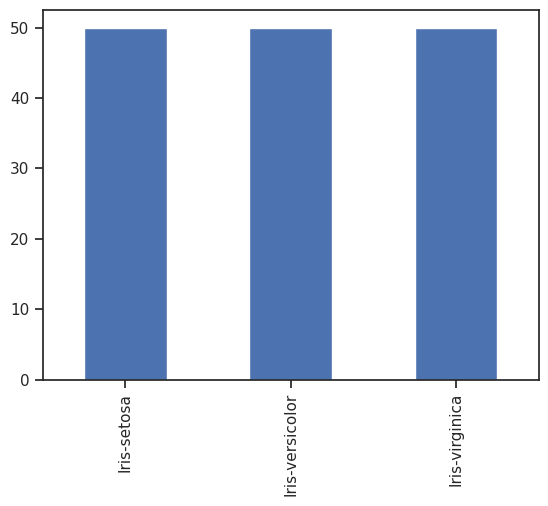

In [16]:
data['Species'].value_counts().plot(kind = 'bar')

동일하게 50개씩 존재합니다. 각 레이블에 대한 분포가 균일합니다. 소프트맥스 회귀 모델을 구성하기 위해 전처리를 진행해야 합니다. 레이블에 해당하는 Species열에 대해서 전부 수치화를 진행해봅시다. 우선 원-핫 인코딩을 수행하기 전 정수 인코딩을 수행합니다. 정상적으로 정수 인코딩이 수행되었는지 확인하기 위하여 다시 한 번 값의 분포를 출력합니다.

<Axes: >

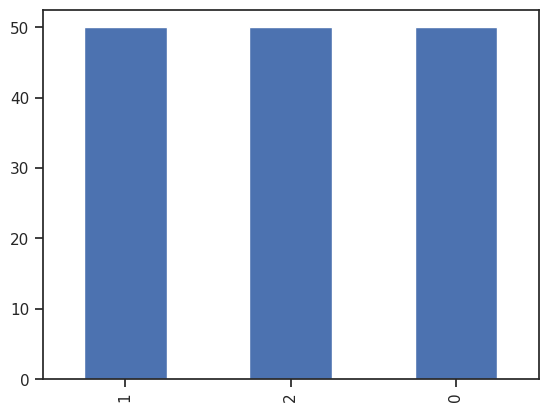

In [17]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2.
data['Species'] = data['Species'].replace(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], [0, 1, 2])
data['Species'].value_counts().plot(kind='bar')

여전히 동일한 분포를 보입니다. 특성과 품종을 각각 종속 변수와 독립 변수 데이터로 분리하는 작업을 수행하고, 정확하게 분리가 되었는지 확인하기 위해 데이터 중 상위 5개씩 출력해보겠습니다.

In [18]:
# X 데이터. 특성 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

In [19]:
# Y 데이터. 예측 대상.
data_y = data['Species'].values

In [20]:
print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


훈련 데이터와 테스트 데이터를 분리하고 레이블에 대한 원-핫 인코딩을 수행해합니다. 그리고 원-핫 인코딩이 진행되었는지 확인하기 위해 훈련 데이터의 레이블과 테스트 데이터의 레이블을 상위 5개씩 출력합니다.

In [21]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

In [22]:
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


2. 소프트맥스 회귀

입력의 차원이 4이므로 input_dim의 인자값이 4로 변경되었습니다. 출력의 차원이 3이므로 input_dim=4 앞의 인자값이 3입니다. 또한 활성화 함수로는 소프트맥스 함수를 사용하므로 activation의 인자값으로 'softmax'를 사용합니다.

오차 함수로는 크로스 엔트로피 함수를 사용합니다. 시그모이드 함수를 사용한 이진 분류 문제에서는 binary_crossentropy를 사용하였지만, 다중 클래스 분류 문제에서는 'categorical_crossentropy를 사용합니다. 옵티마이저로는 경사 하강법의 일종인 아담(adam)을 사용해보았습니다. 아담에 대한 설명은 딥 러닝 챕터에서 다룹니다.

전체 데이터에 대한 훈련 횟수는 200입니다. 이번에는 테스트 데이터를 별도로 분리해서 평가에 사용하였는데, validation_data=()에 테스트 데이터를 기재해주면 실제로는 훈련에는 사용하지 않으면서 각 훈련 횟수마다 테스트 데이터에 대한 정확도를 출력합니다. 즉, 정확도가 전체 데이터에 대한 훈련 1회(1 에포크)마다 측정되고는 있지만 기계는 해당 데이터를 가지고 가중치를 업데이트하지 않습니다.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 1, validation_data = (X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 3ms/step - loss: 2.3723 - accuracy: 0.3333 - val_loss: 2.5131 - val_accuracy: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 1.8753 - accuracy: 0.3000 - val_loss: 1.9309 - val_accuracy: 0.2000
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.5942 - accuracy: 0.2833 - val_loss: 1.6194 - val_accuracy: 0.2000
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.4599 - accuracy: 0.1000 - val_loss: 1.4665 - val_accuracy: 0.1667
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.3719 - accuracy: 0.0917 - val_loss: 1.3517 - val_accuracy: 0.1333
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2867 - accuracy: 0.1000 - val_loss: 1.2702 - val_accuracy: 0.1667
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.1083 - val_loss: 1.2054 - val_accuracy: 0.2333

출력에서 accuracy은 훈련 데이터에 대한 정확도이고, val_accuracy은 테스트 데이터에 대한 정확도를 의미합니다. 이번에는 각 에포크당 훈련 데이터와 테스트 데이터에 대한 정확도를 측정했으므로 한 번 에포크에 따른 정확도를 그래프로 출력해보겠습니다.

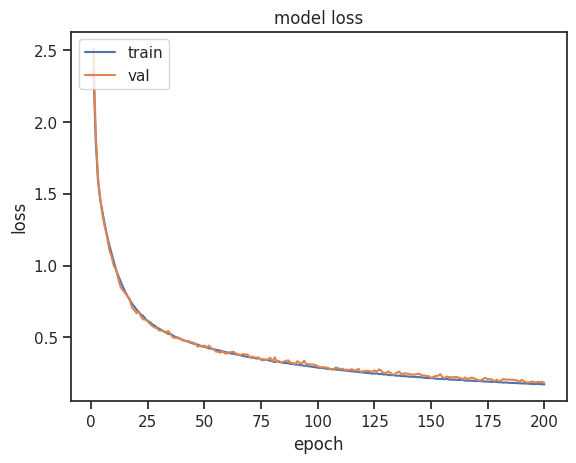

In [26]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

에포크가 증가함에 따라 오차(loss)가 점차적으로 줄어드는 것을 볼 수 있습니다. 케라스에서 테스트 데이터의 정확도를 측정하는 용도로 제공하고 있는 evaluate()를 통해 테스트 데이터에 대한 정확도를 다시 출력해보겠습니다.

In [29]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 26ms/step - loss: 0.1821 - accuracy: 1.0000

 테스트 정확도: 1.0000
